In [4]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
np.set_printoptions(suppress = True)

In [21]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [22]:

newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [5]:
print("\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [6]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [7]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1], dtype=int64)

In [8]:
num_topics, num_top_words = 6, 8

**Stop words, stemming, lemmatization**

In [6]:
from sklearn.feature_extraction import _stop_words

sorted(list(_stop_words.ENGLISH_STOP_WORDS))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\scastaneda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
from nltk import stem

In [13]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [14]:
word_list = ['feet', 'foot', 'foots', 'footing']

In [15]:
[wnl.lemmatize(word) for word in  word_list]

['foot', 'foot', 'foot', 'footing']

In [16]:
[porter.stem(word) for word in word_list]

['feet', 'foot', 'foot', 'foot']

Lemmatize and stem 

fly, flies, flying
organize, organizes, organizing
universe, university

In [17]:
word_list = ['flies', 'fly', 'flying']

In [18]:
[wnl.lemmatize(word) for word in word_list]

['fly', 'fly', 'flying']

In [19]:
[porter.stem(word) for word in word_list]

['fli', 'fli', 'fli']

In [20]:
word_list = {'organize', 'organizes', 'organizing'}

In [21]:
[wnl.lemmatize(word) for word in word_list]

['organizes', 'organize', 'organizing']

In [22]:
{porter.stem(word) for word in word_list}

{'organ'}

Spacy
Stemming and lemmatization are implementation dependent.

Spacy is a very modern & fast nlp library. Spacy is opinionated, in that it typically offers one highly optimized way to do something (whereas nltk offers a huge variety of ways, although they are usually not as optimized).

You will need to install it.

if you use conda:

conda install -c conda-forge spacy
if you use pip:

pip install -U spacy
You will then need to download the English model:

spacy -m download en_core_web_sm

In [9]:
import spacy

In [44]:
nlp = spacy.load("en_core_web_sm")

In [43]:
sorted(list(nlp.Defaults.stop_words))[:20]

["'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also']

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [47]:
import nltk
#nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\scastaneda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
vectorizer = CountVectorizer(stop_words='english') #, tokenizer=LemmaTokenizer())

In [49]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

In [50]:
print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [51]:
vocab = np.array(vectorizer.get_feature_names_out())

**Singular Value Decomposition (SVD)**

In [52]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: total: 2min 10s
Wall time: 13.6 s


In [53]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [54]:
s[:4]

array([433.92698542, 291.51012741, 240.71137677, 220.00048043])

In [55]:

np.diag(np.diag(s[:4]))

array([433.92698542, 291.51012741, 240.71137677, 220.00048043])

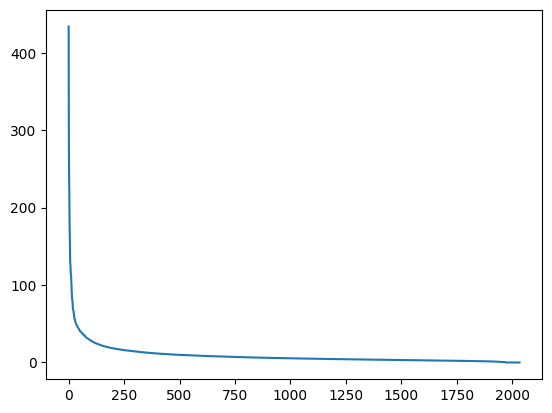

In [56]:
plt.plot(s);

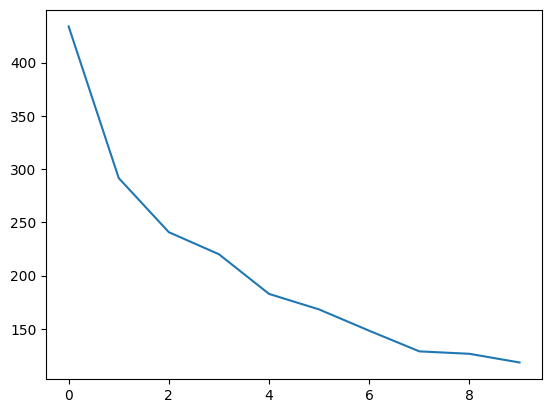

In [57]:
plt.plot(s[:10])

In [58]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [59]:
show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

**Non-negative Matrix Factorization**

In [67]:
m,n = vectors.shape
d = 5 #number of topics

In [68]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

TypeError: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

In [64]:
show_topics(H1)

NameError: name 'H1' is not defined